# HUMAN RESOURCE MANAGER'S PREDICTON##

__LIBRABRIES REQUIRED__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__IMPORTING THE DATAFRAME__

In [2]:
df=pd.read_csv("C:/Users/91832/Desktop/HRP/Human_Resources.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


__DATA CLEANING__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
#Attrition,Over18,OverTime need to be in integers but,are in object form
#Attrition is the record of the employees left or stayed the company
#Assigning "1" to left members and "0" to stayed ones
#Simillarly converting the "Yes" and "No" objects in Over18 and OverTime to 1 and 0 respectively
df["Attrition"]=df["Attrition"].apply(lambda x:1 if x=="Yes" else 0)
df["Over18"]=df["Over18"].apply(lambda x:1 if x=="Y" else 0)
df["OverTime"]=df["OverTime"].apply(lambda x:1 if x=="Yes" else 0)

MISSING/NAN VALUES

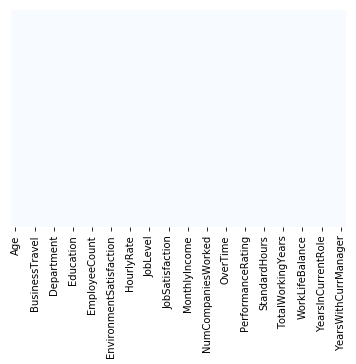

In [5]:
#Checking the missing values using heatmaps
sns.heatmap(df.isnull(),cbar=False,cmap="Blues",yticklabels=False)

SUM OF THE MISSING VALUES

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B51114EF0>,
      dtype=object)

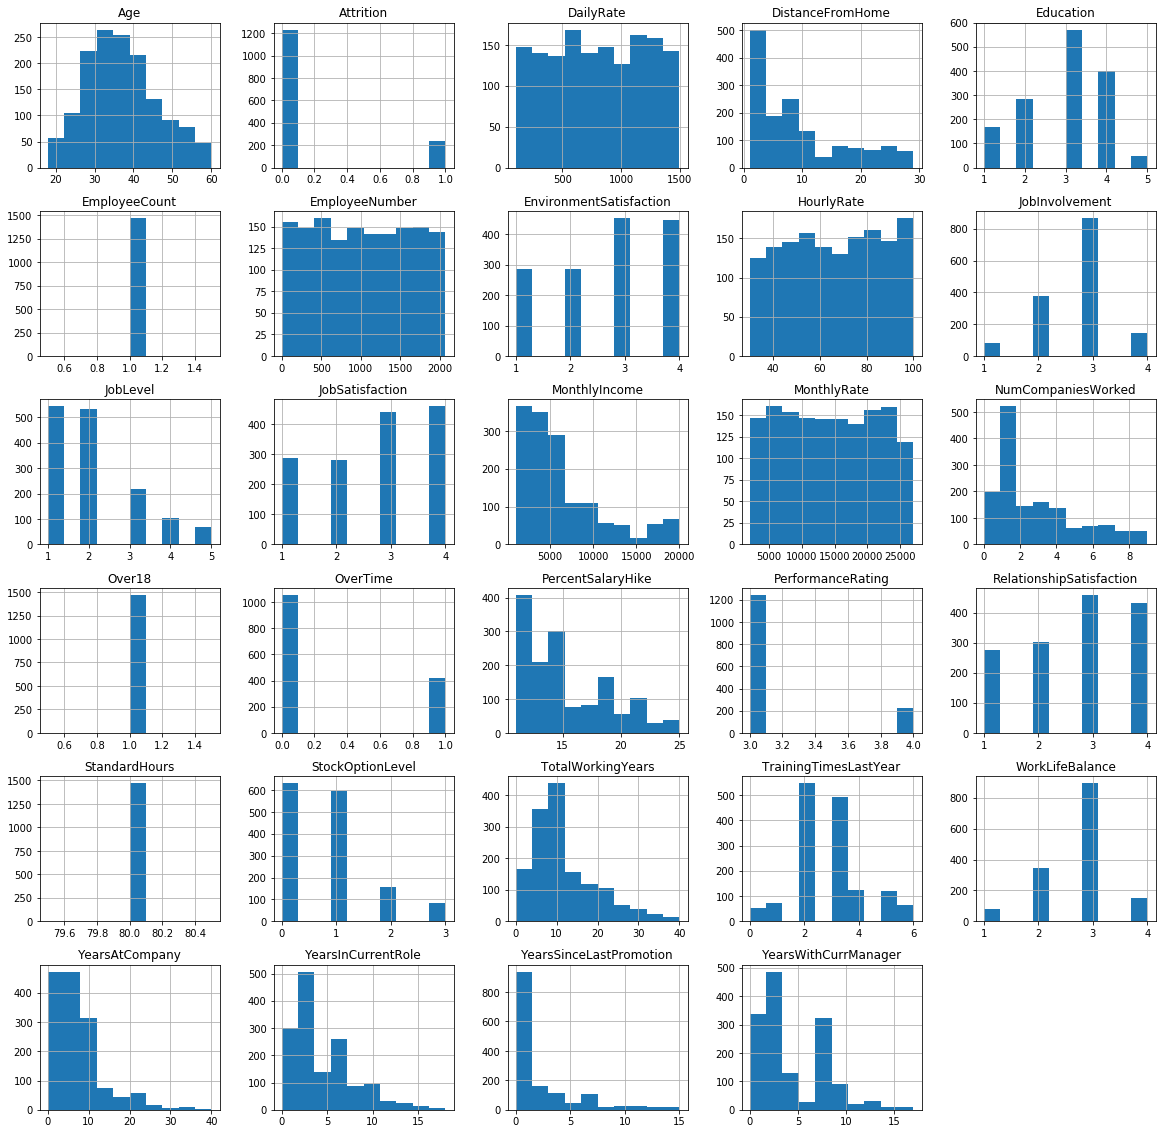

In [8]:
df.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B52312828>,
      dtype=object)

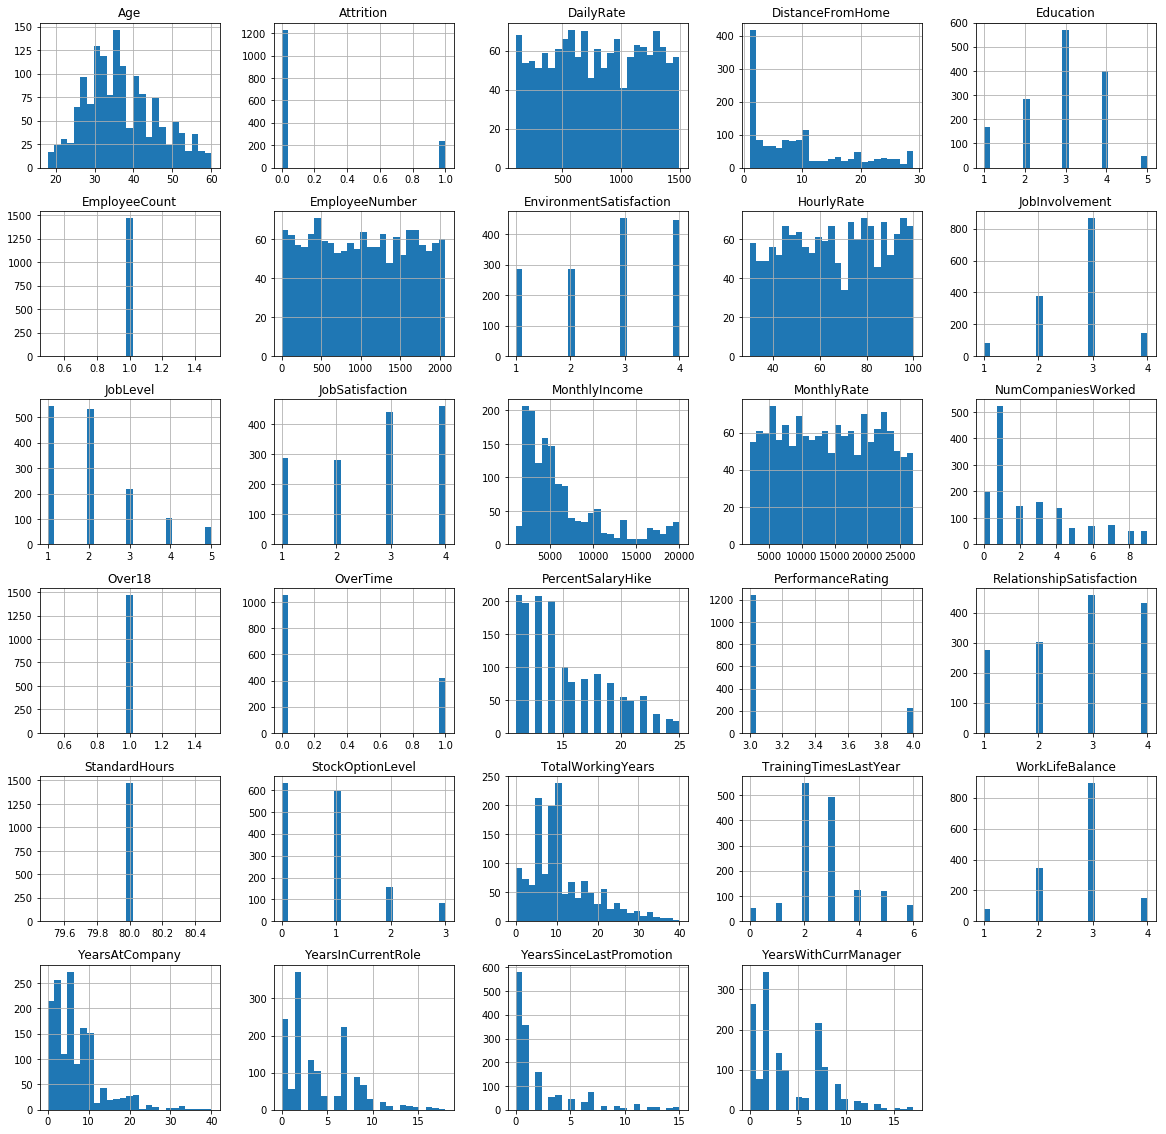

In [9]:
#Using bins to get the equal width of the numeric data
df.hist(figsize=(20,20),bins=25)

In [10]:
#From the above histogram the "EmployeeCount","StandardHours","Over18" are same for every employees
#dropping them
df.drop(["EmployeeCount","Over18","StandardHours"],axis=1,inplace=True)

In [11]:
#Previously there are 35 columns now there are 32
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate            

In [12]:
#EmployeeNumber for the dataframe is not required for the prediction so dropping it
df.drop(["EmployeeNumber"],axis=1,inplace=True)

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


DISTINGUSHING THE ATTRITION DATA FOR LEFT AND STAYED

In [14]:
#taking the left data as "1" and stayed data as "0" to df_left and df_stayed respectively
df_left=df[df["Attrition"]==1]
df_stayed=df[df["Attrition"]==0]

In [15]:
df_left.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3


In [16]:
df_stayed.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0


In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [18]:
#from BusinessTravel we have Rarely and Frequently
#removing Travel for it to get clear outview
#Note:Not much required but part of cleaning
df["BusinessTravel"]=df["BusinessTravel"].apply(lambda x:x.replace(x,x[7:]))

In [19]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked     

In [21]:
#Seems there are some more object types converting them to int type for modeling
#selecting the categorical values to a new dataframe naming df_cat
df_cat=df[["BusinessTravel","Department","Gender","JobRole","MaritalStatus"]]

In [22]:
df_cat.head()

,BusinessTravel,Department,Gender,JobRole,MaritalStatus
0,Rarely,Sales,Female,Sales Executive,Single
1,Frequently,Research & Development,Male,Research Scientist,Married
2,Rarely,Research & Development,Male,Laboratory Technician,Single
3,Frequently,Research & Development,Female,Research Scientist,Married
4,Rarely,Research & Development,Male,Laboratory Technician,Married


In [23]:
#We can't use the categorical values for traing the dataset
#So converting the categorical values to numericals using OneHotEncoder

ONEHOTENCODING

In [24]:
from sklearn.preprocessing import OneHotEncoder
encode=OneHotEncoder()
df_cat=encode.fit_transform(df_cat).toarray()
#toarray() is used to covert into array form

In [25]:
df_cat

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [26]:
#Coverting the obtained array to the dataframe
df_cat=pd.DataFrame(df_cat)

In [27]:
df_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
#taking the numerical values in the df datafram to df_num
df_num=df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [29]:
df_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [30]:
#Now we got 2 data frames for both the numerical and categorical which are converted to numerics using OneHotEncoder
#Combining the both data frames to df_final
df_final=pd.concat([df_num,df_cat],axis=1)

In [31]:
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,10,11,12,13,14,15,16,17,18,19
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
#Checking for type of data
df_final.info()
#Every thing are in int and float,so we are done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
Age                         1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 non-null int64
TotalWorkingYears           1470 non-null int64
TrainingTimesLastYear       1

__DATA VISUALIZATION__

CORRELATION

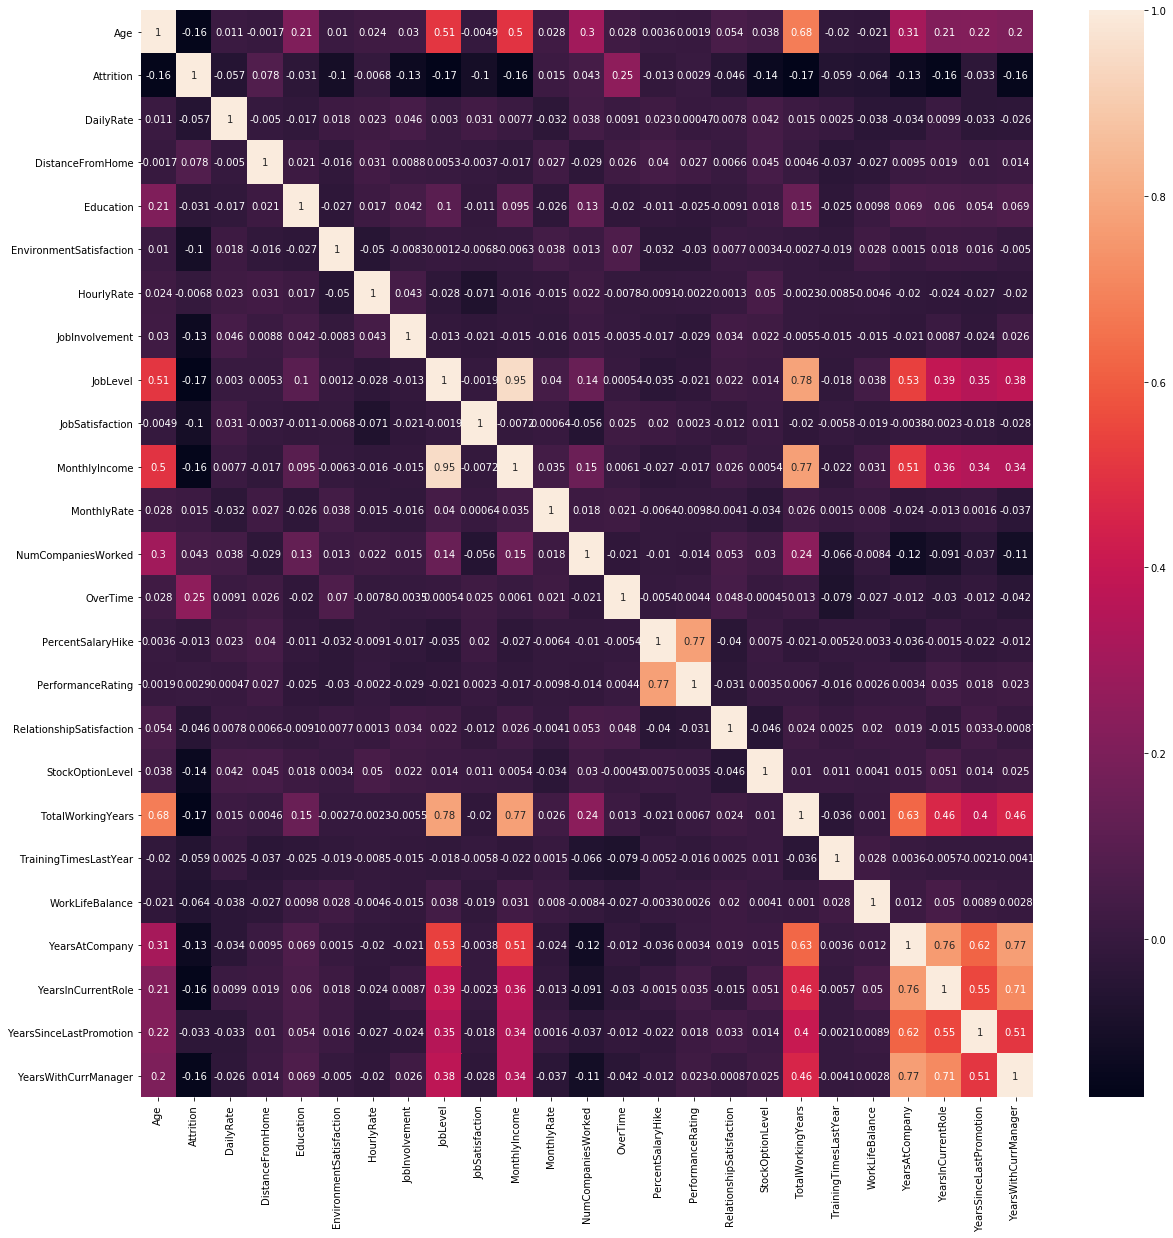

In [33]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

From the heatmap we have observed that the heighest correlations are 0.78,0.77,0.95,0.68

0.78 for the correlation between "JobLevel" and "TotalWorkingYears"

0.77 for the correlation between "MonthlyIncome" and "TotalWorkingYears"

0.95 for the coreelation between the both "MonthlyIncome,JobLevel" and "JobLevel,MonthlyIncome"

0.68 for the correlation between the both "Age,TotalWorkingYears"

COUNTPLOTS TO DISTINGUISH LEFT AND STAYED EMPLOYEES BASED ON THE HIGHLY RATED CORRELATION

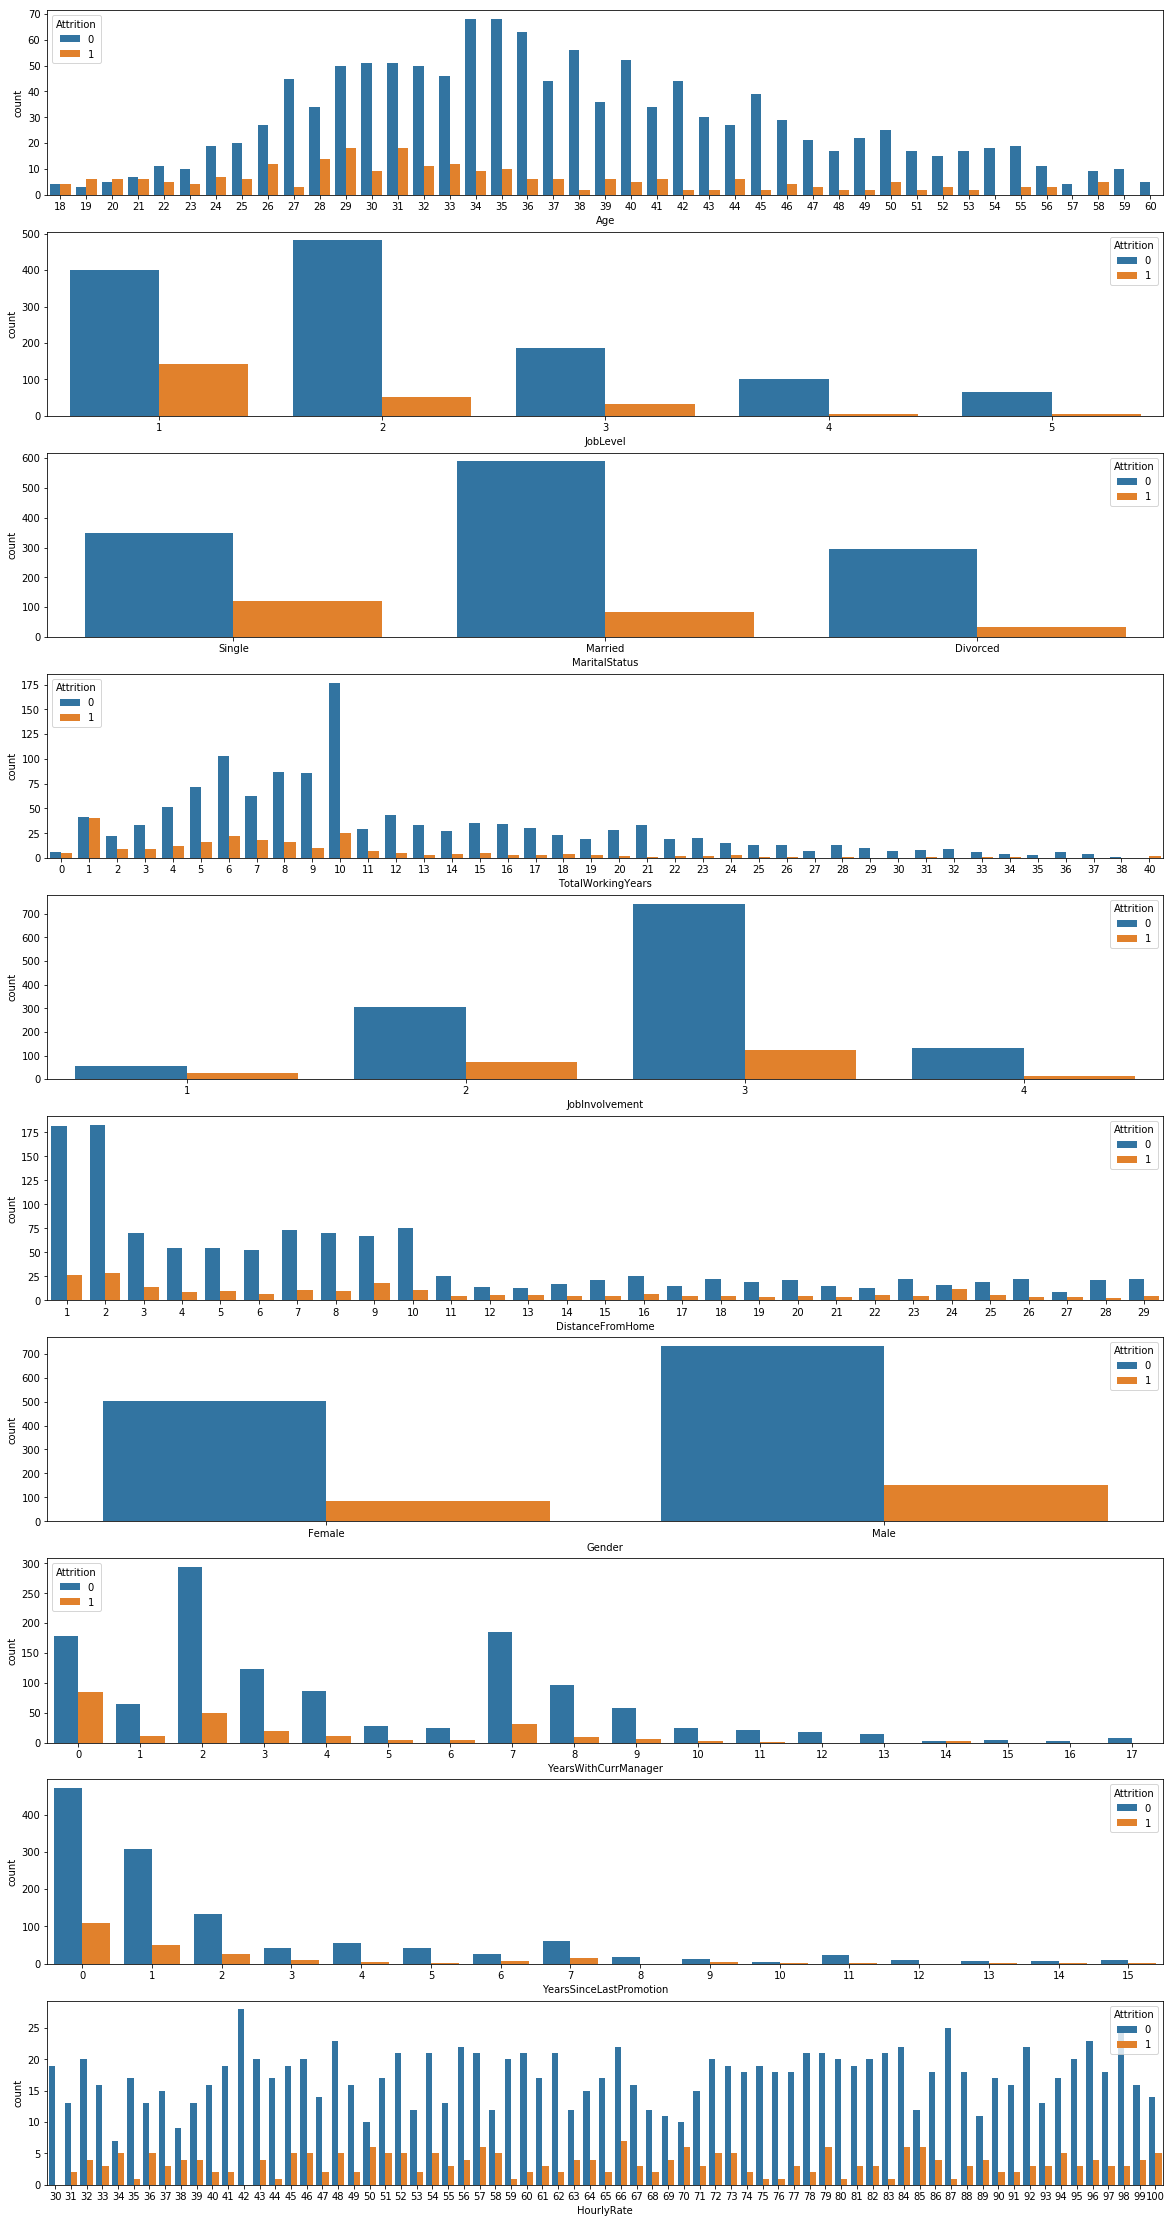

In [34]:
plt.figure(figsize=[20,40])
plt.subplot(10,1,1)
#Based on Age
sns.countplot(x="Age",hue="Attrition",data=df)
plt.subplot(10,1,2)
#Based on JobLevel
sns.countplot(x="JobLevel",hue="Attrition",data=df)
plt.subplot(10,1,3)
#Based on MaritalStatus
sns.countplot(x="MaritalStatus",hue="Attrition",data=df)
plt.subplot(10,1,4)
#Based on TotalWorkingYears
sns.countplot(x="TotalWorkingYears",hue="Attrition",data=df)
plt.subplot(10,1,5)
#Based on JobInvolvement
sns.countplot(x="JobInvolvement",hue="Attrition",data=df)
plt.subplot(10,1,6)
#Based on DistanceFromHome
sns.countplot(x="DistanceFromHome",hue="Attrition",data=df)
#Based on Gender
plt.subplot(10,1,7)
sns.countplot(x="Gender",hue="Attrition",data=df)
#Based on Manager
plt.subplot(10,1,8)
sns.countplot(x="YearsWithCurrManager",hue="Attrition",data=df)
#Based on Promotions
plt.subplot(10,1,9)
sns.countplot(x="YearsSinceLastPromotion",hue="Attrition",data=df)
#Based on HourlyRate
plt.subplot(10,1,10)
sns.countplot(x="HourlyRate",hue="Attrition",data=df)

__MODEL CREATION__

In [35]:
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,10,11,12,13,14,15,16,17,18,19
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


MIN MAX SCALING

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(df_final)

C:\Users\91832\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [37]:
#setting the Attrition as the Target
y=df["Attrition"]

SELECTING THE TRAINING AND THE TESTING DATA

In [38]:
from sklearn.model_selection import train_test_split
#selecting 40% of the data for testing and remaining for training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

MODEL USING LOGISTICREGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression as LR
A=LR(solver="liblinear").fit(x_train,y_train)

In [40]:
yhat=A.predict(x_test)

CONFUSION MATRIX

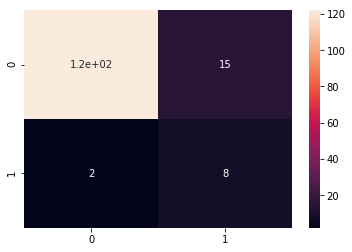

In [41]:
from sklearn.metrics import confusion_matrix
B=confusion_matrix(yhat,y_test)
sns.heatmap(B,annot=True)

ACCURACY SCORE

In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy_score using LogisticRegression =",str(accuracy_score(yhat,y_test)*100)+str("%"))

Accuracy_score using LogisticRegression = 88.43537414965986%


CLASSIFICATION REPORT

In [43]:
from sklearn.metrics import classification_report
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       137
           1       0.35      0.80      0.48        10

   micro avg       0.88      0.88      0.88       147
   macro avg       0.67      0.85      0.71       147
weighted avg       0.94      0.88      0.90       147



MODEL USING RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier
D=RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

In [45]:
yhat_R=D.predict(x_test)

CONFUSION MATRIX

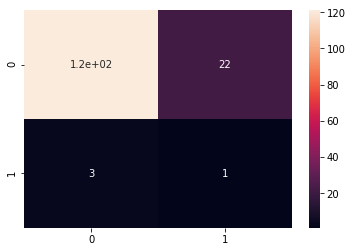

In [46]:
E=confusion_matrix(yhat_R,y_test)
sns.heatmap(E,annot=True)

ACCURACY SCORE

In [47]:
print("Accuracy_Score using RandomForest =",str(accuracy_score(yhat_R,y_test)*100)+str("%"))

Accuracy_Score using RandomForest = 82.99319727891157%


CLASSIFICATION REPORT

In [48]:
print(classification_report(yhat_R,y_test))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       143
           1       0.04      0.25      0.07         4

   micro avg       0.83      0.83      0.83       147
   macro avg       0.51      0.55      0.49       147
weighted avg       0.95      0.83      0.88       147

